In [54]:
from google.colab import drive
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split, Dataset
import PIL
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip -qq '/content/drive/MyDrive/datasets/archive_6.zip'

In [13]:
! mkdir '/content/datasets'

In [16]:
! mv /content/Mask/Mask/* /content/datasets/

In [18]:
! mv /content/NoMask/NoMask/* /content/datasets/

In [34]:
class ImageData(Dataset):
  def __init__(self, img_path, img_labels, trans=None):
    self.img_path = img_path
    self.img_labels = torch.Tensor(img_labels)
    if trans is None:
      self.transforms = transforms.ToTensor()
    else:
      self.transforms = trans

  def __getitem__(self, index):
    curr_path = self.img_path[index]
    curr_img = PIL.Image.open(curr_path)
    curr_img = self.transforms(curr_img)

    return curr_img, self.img_labels[index]

  def __len__(self):
    return len(self.img_path)

In [20]:
img_lists = glob.glob(os.path.join('/content/datasets/', '*'))

In [30]:
labels = [0 if img_path.split('/')[3][0] == 'M' else 1 for img_path in img_lists]

In [89]:
transformations = transforms.Compose([transforms.Resize((300, 300)),  # resize to input shape of our CNN
                                     # transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.3),
                                      transforms.RandomRotation(40),
                                      #transforms.RandomAffine(degrees=0, scale=(0.8, 1.2), shear=0.2),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()  # convert PIL to Tensor
                                      ])

In [90]:
mask_data = ImageData(img_lists, labels, trans=transformations)

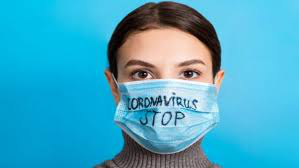

In [98]:
# get a sample image
sample_img_path = os.path.join('/content/datasets/', os.listdir('/content/datasets/')[17])
sample_img = PIL.Image.open(sample_img_path)
display(sample_img)

(-0.5, 299.5, 299.5, -0.5)

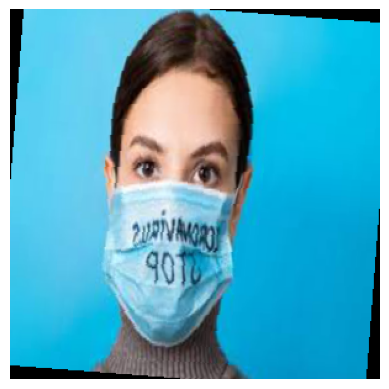

In [99]:
image = mask_data[17][0].cpu().numpy()
image = np.transpose(image, (1, 2, 0))
plt.imshow(image)
plt.axis('off')